<div style="border: 3px solid green; padding: 15px"><font color='green' size=5 ><b>Комментарий ревьюера v2</b></font> 

Иван, привет! Спасибо тебе за доработку. Сейчас посмотрим) Мои комментарии будут в таких блоках 
Заключительный комментарий будет в самом конце проекта)</div>


Привет, Иван! Меня зовут Антон Соловьев и я буду проверять твой проект. Предлагаю общаться на «ты», если это не вызывает никаких проблем.
Моя цель не указать на твои ошибки, а помочь тебе научиться и стать крутым аналитиком данных.

 <font color='green' size=4>Общие впечатления</font> 
 Твоя работа очень хорошая) все аккуратно и хорошо оформлено. Код тоже очень хороший. Одна есть ряд моментов, которые нам нужно исправить)


Далее по тексту ты найдешь мои комментарии. Комментарии будут в <font color='green'>зеленой</font>, <font color='orange'>желтой</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b> 👍 Успех:</b> Все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b> ⚠️ Совет: </b> Есть что улучшить в твоем коде или выводах
</div>

<div class="alert alert-block alert-danger">
<b> ❌ Нужно исправить:</b> Требуется исправление. Работа не может быть принята с красными комментариями.
</div>

Пожалуйста не удаляй мои комментарии. Так как они повышают качество повторного ревью. 
Если ты исправляешь что-то в проекте — пожалуйста комментируй. По возможности выделяй свои комментарии, например, вот так:

<div class="alert alert-block alert-info">
<b>Комментарий студента </b> 
    Привет Антон, спасибо за удленное время, далее по работе учту и внесу необходимые правки.
</div>

Поехали!

## Шаг 1. Открытие файла с данными и изучение общей информации


<div class="alert alert-block alert-warning">
<b> ⚠️ Совет: </b> Перед начало работы всегда хорошо бы давать крактие вводные и приводить краткий план работы. ДЛя постороннего человека, в том числе и для заказчика проекта это удобно. Так как он сразу вводится в курс дела)
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента </b> 

Спасибо, за совет, ниже добавил описание к выполянемой работе.
</div>

<b>Описание проекта</b>

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<b>Описание тарифов</b>

<b>Тариф «Смарт»</b>

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

минута разговора: 3 рубля

сообщение: 3 рубля

1 Гб интернет-трафика: 200 рублей

<b>Тариф «Ультра»</b>

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

минута разговора: 1 рубль

сообщение: 1 рубль

1 Гб интернет-трафика: 150 рублей

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from functools import reduce
from scipy import stats as st  

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Импортируем необходимые модули для выполнения работы и загружаем файлы, присваивая их переменным (для удобства, возмьем названия для переменных такими же как и названия самих файлов)

## Шаг 2. Подготовка данных

### Приведение данных к нужному типу  и исправление ошибок

#### Изучение calls

In [3]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Согласно условиям задачи, необходимо выполнить округление в большую сторону для звонков (duration)

#### Предобработка данных calls

In [5]:
# приведем дату в datetime64
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
#добавим месяц для сводной таблицы
calls['month'] = calls['call_date'].dt.month 
#округление звонков в большую сторону(поминутная тарификация)
calls['duration'] = np.ceil(calls['duration'])
calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
5,1000_5,2018-11-02,0.0,1000,11
6,1000_6,2018-10-18,0.0,1000,10
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9
9,1000_9,2018-08-15,0.0,1000,8



<div class="alert alert-block alert-warning">
<b> ⚠️ Совет: </b>Молодец, что не забыл про округление звонков. Правильно перевел в тип даты и выделил столбец с месяцем. Но для того, чтобы округлять необязательно было использовать apply(). Метод np.ceil работает сразу со всем столбцом)
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента </b> 

Понял, переделал как надо, округление сдлела для столбца при помощи метода np.ceil()
</div>

<div style="border: 3px solid green; padding: 15px"><font color='green' size=5 ><b>Комментарий ревьюера v2</b></font> 

Да, все верно)</div>


#### Изучение internet

In [6]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


#### Предобработка internet

In [8]:
# привели дату в datetime64
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
#добавили месяц для сводной
internet['month'] = internet['session_date'].dt.month 


<s><div class="alert alert-block alert-danger">
<b> ❌ Нужно исправить:</b> Смотри по условию задачи у нас нельзя округлять интернет сессии. Мы округляем только суммарные ГБ. Поэтому в данном разделе я попрошу убрать округления МБ. Плюс на будущее: такие кастомные способы округления могут привести к ошибкам. У тебя ранее совершенно верно использовался метод np.ceil)
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента </b> 
Меня смутил что необходимо округление по условиям задания, а что нельзя интернет сесии округлять почему-то неучел, поправил, убрал округление Мб.
</div>

<div style="border: 3px solid green; padding: 15px"><font color='green' size=5 ><b>Комментарий ревьюера v2</b></font> 

Теперь все верно)</div>


#### Изучение messages

In [9]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


#### Предобработка messages

In [11]:
# приведем дату в datetime64
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
#добавим месяц для сводной
messages['month'] = messages['message_date'].dt.month 

<div class="alert alert-block alert-success">
<b> 👍 Успех:</b> Здесь все верно)
</div>

#### Изучение tariffs

In [12]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


#### Изучение users

In [14]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#### Предобработка users

In [16]:
# приведем дату в datetime64
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

<div class="alert alert-block alert-success">
<b> 👍 Успех:</b> Тоже все хорошо)
</div>

Все таблицы были проверены на наличие дубликатов и выполнена проверка city на регистр. Ошибок обнаружено не было.

### Расчеты для каждого пользователя:

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [17]:
calls_in_month = calls.pivot_table(
    index=['user_id', 'month'],
    values='duration',
    aggfunc=['count', 'sum']
)
calls_in_month.columns = ['calls', 'duration']

In [18]:
calls_in_month # проверка

calls  duration
user_id month                 
1000    5         22     159.0
        6         43     172.0
        7         47     340.0
        8         52     408.0
        9         58     466.0
...              ...       ...
1498    10        41     247.0
1499    9          9      70.0
        10        68     449.0
        11        74     612.0
        12        69     492.0

[3174 rows x 2 columns]

#### Количество отправленных сообщений по месяцам

In [19]:
messages_in_month = messages.pivot_table(
    index=['user_id', 'month'],
    values='id',
    aggfunc='count'
)
messages_in_month.columns = ['num_messages']

In [20]:
messages_in_month # проверка

num_messages
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57
...                     ...
1498    10               42
1499    9                11
        10               48
        11               59
        12               66

[2717 rows x 1 columns]

#### Объем израсходованного интернет-трафика по месяцам

In [21]:
internet_in_month = internet.pivot_table(
    index=['user_id', 'month'],
    values='mb_used',
    aggfunc='sum'
)
internet_in_month.columns = ['mb']

In [22]:
internet_in_month # проверка

mb
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

<div class="alert alert-block alert-success">
<b> 👍 Успех:</b> Данный раздел выполнен на 5+. Все группировки верные)
</div>

#### Помесячная выручка с каждого пользователя

In [23]:
# Объеденим звонки, минуты, гигобайты каждого пользователя, и добавим тарифный план
df_users = calls_in_month.merge(messages_in_month,  on=['user_id', 'month'], how='outer')
df_users = df_users.merge(internet_in_month,  on=['user_id', 'month'], how='outer')
df_users = df_users.reset_index(drop=False)
df_users = df_users.merge(users[['user_id', 'tariff']], on='user_id', how='left')

<div class="alert alert-block alert-success">
<b> 👍 Успех:</b> Раздел выполнен на 5+. Приведу основные моменты с которыми ты круто справился:
    1. Таблицы предварительно сгруппированы
    2. Объединение происходит именно по двум столбцам: ['user_id', 'month']
    3. Метод объединения outer- это не дает нам потерять лишние данные
</div>

In [24]:
# Пропущенные значения заменим на "ноль"
df_users.loc[df_users['duration'].isna(), 'duration'] = 0
df_users.loc[df_users['calls'].isna(), 'calls'] = 0
df_users.loc[df_users['num_messages'].isna(), 'num_messages'] = 0
df_users.loc[df_users['mb'].isna(), 'mb'] = 0
df_users.info() # выполним проверку

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       3214 non-null   int64  
 1   month         3214 non-null   int64  
 2   calls         3214 non-null   float64
 3   duration      3214 non-null   float64
 4   num_messages  3214 non-null   float64
 5   mb            3214 non-null   float64
 6   tariff        3214 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 200.9+ KB



<div class="alert alert-block alert-warning">
<b> ⚠️ Совет: </b> Итоговая таблица получилась верная. Но когда происходят такие вот крупные объединения нескольких таблиц - хорошо бы делать проверку на корректность объединения. Можно к примеру проверить на количество уникальных пользователей. Также можно проверить - совпадают ли количества минут, СМС и Гб из итоговой таблицы и изначальных. 
    Такая проверка покажет не потерялись ли данные при объединении таблиц)
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента </b> 
Понял, спасибо, дополнительно проверил на пропуски.
</div>

In [25]:
# проверим на пропуски получившийся датафрейм

df_users.isnull().sum()

user_id         0
month           0
calls           0
duration        0
num_messages    0
mb              0
tariff          0
dtype: int64

Вычитаем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножаем на значение из тарифного плана; прибавляем абонентскую плату, соответствующую тарифному плану).

In [26]:
# Пишем функцию для выполнения условия, описанного выше
def revenue_calc(row):
    duration = row['duration']
    calls = row['calls']
    num_messages = row['num_messages']
    mb = row['mb']
    tariff = row['tariff']
    
    if tariff == 'smart':
        over_duration = duration - tariffs.loc[0, 'minutes_included']
        over_mb = mb - tariffs.loc[0, 'mb_per_month_included']
        over_messages = num_messages - tariffs.loc[0, 'messages_included']
        
        if over_duration < 0:
            over_duration = 0
        if over_mb < 0:
            over_mb = 0
        if over_messages < 0:
            over_messages = 0
        
        return (tariffs.loc[0, 'rub_per_message'] * over_messages + 
                   tariffs.loc[0, 'rub_per_gb'] * np.ceil(over_mb / 1024 ) + 
                   tariffs.loc[0, 'rub_per_minute'] * over_duration + 
                   tariffs.loc[0, 'rub_monthly_fee']
                  ) 
    else:
        over_duration = duration - tariffs.loc[1, 'minutes_included']
        over_mb = mb - tariffs.loc[1, 'mb_per_month_included']
        over_messages = num_messages - tariffs.loc[1, 'messages_included']
        
        if over_duration < 0:
            over_duration = 0
        if over_mb < 0:
            over_mb = 0
        if over_messages < 0:
            over_messages = 0
        
        return (tariffs.loc[1, 'rub_per_message'] * over_messages + 
                   tariffs.loc[1, 'rub_per_gb'] * np.ceil(over_mb / 1024) + 
                   tariffs.loc[1, 'rub_per_minute'] * over_duration + 
                   tariffs.loc[1, 'rub_monthly_fee']
                  )

<s><div class="alert alert-block alert-danger">
<b> ❌ Нужно исправить:</b> Функция отрабатывает верно. Но давай исправим перевод в ГБ и округление. Сейчас это ручной способ. Давай воспользуемся готовыми инструментами округления вверх) Ты кстати им пользовался ранее) 
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента </b> 
Добавил округение  мегабайтов вверх до гигабайт при помощи np.ceil.
</div>

<div style="border: 3px solid green; padding: 15px"><font color='green' size=5 ><b>Комментарий ревьюера v2</b></font> 

Отлично! Теперь все верно и похоже на правду)</div>


In [27]:
df_users['revenue'] = df_users.apply(revenue_calc, axis=1) # добаляем новый столбец revenue для расчета
df_users # поверяем выполнение заданного условия (заполнение столбца revenue)

,user_id,month,calls,duration,num_messages,mb,tariff,revenue
0,1000,5,22.0,159.0,22.0,2253.49,ultra,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,ultra,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,ultra,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,ultra,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,ultra,1950.0
...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30,smart,950.0
3210,1489,10,0.0,0.0,21.0,19559.44,smart,1550.0
3211,1489,11,0.0,0.0,20.0,17491.56,smart,1150.0
3212,1489,12,0.0,0.0,35.0,17322.51,smart,950.0


## Шаг 3. Анализируем данные

###  Количество минут разговора,  сообщений и  объём интернет-трафика требующееся пользователям каждого тарифа в месяц

In [28]:
average_demand = df_users.pivot_table(index='user_id', values=['duration', 'num_messages', 'mb', 'revenue', 'tariff'], aggfunc='median')

In [29]:
average_demand = average_demand.merge(users[['user_id', 'tariff',]], on='user_id', how='left')
average_demand

,user_id,duration,mb,num_messages,revenue,tariff
0,1000,339.0,14312.420,65.0,1950.0,ultra
1,1001,422.0,16233.000,0.0,850.0,smart
2,1002,214.0,17580.100,11.0,1150.0,smart
3,1003,824.0,11356.890,83.0,1950.0,ultra
4,1004,132.5,17810.530,154.5,1950.0,ultra
...,...,...,...,...,...,...
493,1495,954.0,29363.000,82.0,1950.0,ultra
494,1496,524.0,24037.255,41.5,2473.0,smart
495,1497,490.0,14156.080,17.0,550.0,smart
496,1498,323.5,21356.885,43.0,1850.0,smart


### Среднее колличество по тарифам

In [30]:
tariff_consumption = average_demand.pivot_table(index='tariff', values=['duration', 'mb', 'num_messages', 'revenue'])
tariff_consumption['rub_monthly_fee'] = [550, 1950]
tariff_consumption = tariff_consumption.reset_index(drop=False)
round(tariff_consumption,2) # для наглядности окргулили полученные данные до 2 знака

,tariff,duration,mb,num_messages,revenue,rub_monthly_fee
0,smart,437.47,16831.94,33.77,1303.68,550
1,ultra,557.50,20303.39,56.98,2061.49,1950


### Выводы

Пользователи тарифа Ультра платят больше, но и пользуются услугами в большем объеме. Пользователям тарифа смарт не хватает выделенного интернета (15 Гб), им приходится его докупать.

<div class="alert alert-block alert-success">
<b> 👍 Успех:</b> Здесь соглашусь) все сделано хорошо)

### Расчет среднее количество, дисперсии и стандартного отклонения

In [31]:
desc_stat = average_demand.pivot_table(index=['tariff'], values=['duration', 'mb', 'num_messages'], 
                    aggfunc=[np.median, np.var, np.std])
round(desc_stat,2) # округлили для удобства

median                              var                            \
       duration        mb num_messages  duration           mb num_messages   
tariff                                                                       
smart    439.75  16925.29         28.5  25685.39  17423974.06       784.60   
ultra    535.25  19733.15         47.5  92290.58  79085500.25      2424.26   

            std                       
       duration      mb num_messages  
tariff                                
smart    160.27  4174.2        28.01  
ultra    303.79  8893.0        49.24

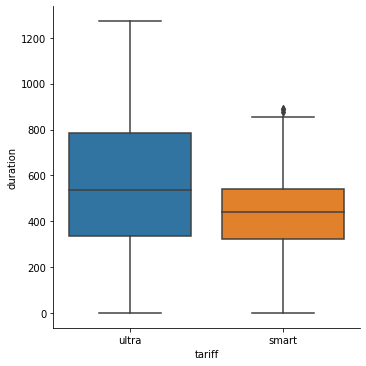

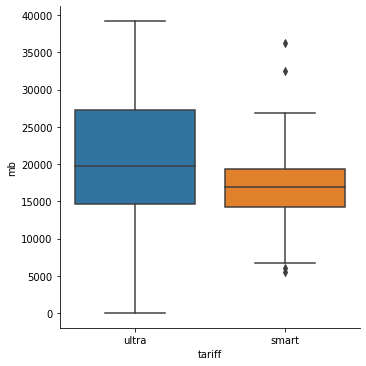

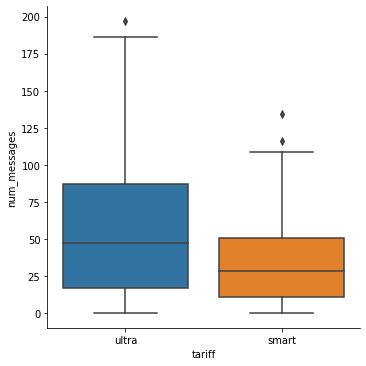

In [32]:
for column in ['duration', 'mb', 'num_messages']:    
    sns.catplot(x='tariff', y=column, kind="box", data=average_demand, orient='v')

<div class="alert alert-block alert-warning">
<b> ⚠️ Совет: </b>  Не забывай пожалуйста делать заголовки графикам и  подписи осей.  В следующих проектах, если у тебя не будут оформлены графики по всем правилам, тебе могут вернуть проект. Такое оформление графиков очень важно. Человек должен смотреть сразу на график и понимать о чем он) То есть все подписи -  на русском и с единицами измерения ( если это возможно)
    
</div>

In [33]:
average_demand

,user_id,duration,mb,num_messages,revenue,tariff
0,1000,339.0,14312.420,65.0,1950.0,ultra
1,1001,422.0,16233.000,0.0,850.0,smart
2,1002,214.0,17580.100,11.0,1150.0,smart
3,1003,824.0,11356.890,83.0,1950.0,ultra
4,1004,132.5,17810.530,154.5,1950.0,ultra
...,...,...,...,...,...,...
493,1495,954.0,29363.000,82.0,1950.0,ultra
494,1496,524.0,24037.255,41.5,2473.0,smart
495,1497,490.0,14156.080,17.0,550.0,smart
496,1498,323.5,21356.885,43.0,1850.0,smart


### Выводы

Дисперсия у тарифа "Ультра" больше, и медианы смещены в большую сторону. Эти тарифы выгодее для оператора.

<div class="alert alert-block alert-success">
<b> 👍 Успех:</b> Согласен) двигаемся дальше)
</div>

### Построение гистограмм.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Гистограмма звонков')

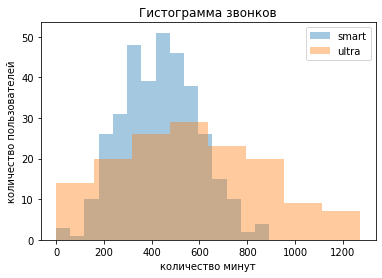

In [34]:
smart = average_demand.query("tariff == 'smart'")
ultra = average_demand.query("tariff == 'ultra'")
sns.distplot(smart['duration'], kde=False)
sns.distplot(ultra['duration'], kde=False)
plt.legend(['smart', 'ultra'])
plt.xlabel('количество минут')
plt.ylabel('количество пользователей')
plt.title('Гистограмма звонков')

In [35]:
smart

,user_id,duration,mb,num_messages,revenue,tariff
1,1001,422.0,16233.000,0.0,850.0,smart
2,1002,214.0,17580.100,11.0,1150.0,smart
5,1005,593.5,7833.230,49.0,836.5,smart
6,1006,356.0,15521.530,0.0,750.0,smart
7,1007,480.0,14427.330,26.0,981.0,smart
...,...,...,...,...,...,...
492,1494,411.0,17621.210,0.0,1150.0,smart
494,1496,524.0,24037.255,41.5,2473.0,smart
495,1497,490.0,14156.080,17.0,550.0,smart
496,1498,323.5,21356.885,43.0,1850.0,smart


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Гистограмма интернет траффика')

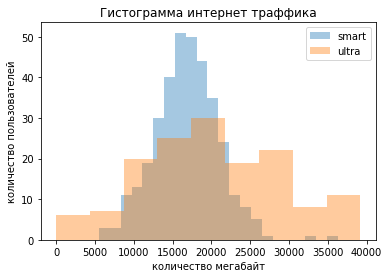

In [36]:
smart = average_demand.query("tariff == 'smart'")
ultra = average_demand.query("tariff == 'ultra'")
sns.distplot(smart['mb'], kde=False)
sns.distplot(ultra['mb'], kde=False)
plt.legend(['smart', 'ultra'])
plt.xlabel('количество мегабайт')
plt.ylabel('количество пользователей')
plt.title('Гистограмма интернет траффика')

Text(0.5, 1.0, 'Гистограмма сообщений')

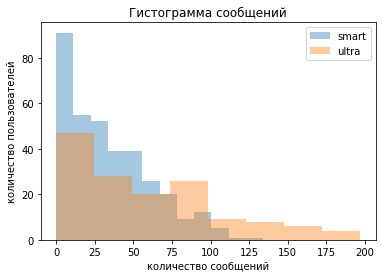

In [37]:
smart = average_demand.query("tariff == 'smart'")
ultra = average_demand.query("tariff == 'ultra'")
sns.distplot(smart['num_messages'], kde=False)
sns.distplot(ultra['num_messages'], kde=False)
plt.legend(['smart', 'ultra'])
plt.xlabel('количество сообщений')
plt.ylabel('количество пользователей')
plt.title('Гистограмма сообщений')

<s><div class="alert alert-block alert-danger">
<b> ❌ Нужно исправить:</b> Все гистограммы построены отлично! И кстати оформлены тоже хорошо) Давай еще построим гистограммы по выручке? Перспективный тариф - это ключевой вопрос исследования. А без анализа денег, на него будет сложно ответить)
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента </b> 
Добавил гистограмму потраченных денег клиентами для сравниваемых тарифов.
</div>

Text(0.5, 1.0, 'Гистограмма выручки')

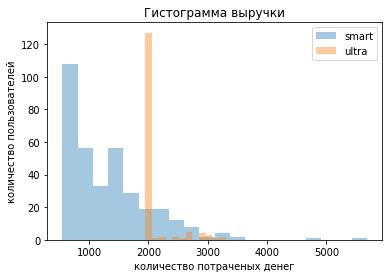

In [44]:
smart = average_demand.query("tariff == 'smart'")
ultra = average_demand.query("tariff == 'ultra'")
sns.distplot(smart['revenue'], kde=False)
sns.distplot(ultra['revenue'], kde=False)
plt.legend(['smart', 'ultra'])
plt.xlabel('количество потраченых денег')
plt.ylabel('количество пользователей')
plt.title('Гистограмма выручки')

<div style="border: 3px solid green; padding: 15px"><font color='green' size=5 ><b>Комментарий ревьюера v2</b></font> 

Принимается)</div>


### Выводы

Проанализировав построенные гистограммы можно сказать, что дисперсия на тарифе "Ультра" больше, чем у пользователей с тарифом "Смарт". Пользователи тарифа Смарт явно себя ограничивают, что достаточно логично, они пытаются сэкономить на связи и поэтому используют услуги не в полном объеме, что бы не доплачивать за них.



<div class="alert alert-block alert-warning">
<b> ⚠️ Совет: </b> лучше сравнивать медианные или средние продажи. Потому, что дисперсия это не лучший показатель) Она покажет разброс вокруг среднего да еще к тому же в безразмерных величинах)
</div>

## Шаг 4. Проверка гипотезы

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Формирование гипотез:

H0 — Средняя выручка пользователей тарифов "Ультра" и "Смарт" равна

H1 — Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается

Критический уровень статистической значимости 5%, можно брать и меньше, но есть риск отбросить работающую гипотезу.

In [38]:
alpha = 0.05 
results = st.ttest_ind(
    smart['revenue'], 
    ultra['revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1997155657827758e-30
Отвергаем нулевую гипотезу


### Выводы 

Вероятность очень мала (з-значение), поэтому гипотеза H0 не подтвердилась. В связи с этим принимается альтернативная гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

<s><div class="alert alert-block alert-danger">
<b> ❌ Нужно исправить:</b>  Давай здесь попробуем правильно сформулировать результы проверки гипотезы. Нужен какой то заключающий вывод: принимаем или нет гипотезу?  И будь внимателен даже если наша нулевая гипотеза не потдвердилась, мы не можем говорить о том, что выручки различаются. Мы должны говорить напиример: принимается альтернативная гипотеза о том, что средние выручки различны. Или например так: "p-значение достаточно мало, что дает основание отвергнуть предположение об отсутствии различий между выручками у разных тарифных планов" 
    
   Статистика сурова и беспощадна)) В ней нельзя  однозачно утверждать)
   
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента </b> 
Вывод изменил.
</div>

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

H0 — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

H1 — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

Критический уровень статистической значимости 5%

In [39]:
average_demand = average_demand.merge(users[['user_id', 'city',]], on='user_id', how='left')

In [40]:
moscow = average_demand.query('city == "Москва"')['revenue']
regions = average_demand.query('city != "Москва"')['revenue']

In [41]:
alpha = 0.05 
results = st.ttest_ind(moscow, regions)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3235977865687646
Не получилось отвергнуть нулевую гипотезу


### Выводы

Вероятность составляет чуть более 32% -  нулеву гипотезу отвергнуть не получилось, что не дает основание отвергнуть предположение, что средняя выручка из Москвы не отличается от выручки из других регионов.

<s><div class="alert alert-block alert-danger">
<b> ❌ Нужно исправить:</b>  Здесь тоже самое) нельзя однозначно утвержать) Гипотеза может приняться или отклониться. Только так)
   
</div>

<div style="border: 3px solid green; padding: 15px"><font color='green' size=5 ><b>Комментарий ревьюера v2</b></font> 
По обоим пунктам ОК</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента </b> 
Вывод изменил.
</div>

In [42]:
users['tariff'].value_counts() # посчитаем количетво пользователей для каждого тарифа

smart    351
ultra    149
Name: tariff, dtype: int64

## Общие выводы по работе

По результатам статистического анализа для оператора доходы от тарифа «Ультра»(2062р.) больше, чем от тарифа «Смарт»(1329р.)
- Судя по гистограммам не все пользователи тарифа «Ультра» выробатывают весь доступный лимит.
- Колличество пользователей тарифа «Смарт» больше в 2 раза, что можно объяснить более выгодными условиями, люди пытаютя сэкономить, поэтому чм ниже цена, тем больше пользователей
- Доплат по тарифу «Ультра» очень мало. В тарифе «Смарт» часто доплачивают за дополнительные пакеты гигобайт
- Средние доходы от пользователей в Москве не отличаются от доходов в других населенных пунктах

Отвечая на вопрос какой тариф лучше для оператора, это тариф Ультра.

<div class="alert alert-block alert-success">
<b> 👍 Успех:</b> Спасибо за итоговый вывод! Такие выводы очень важны в исследованиях. И главное ты ответил на центральный вопрос исследования)
</div>

## <font color='red'>Итоговый комментарий</font> 

Спасибо за качественный проект! Мне понравился твой код и твои выводы. Твоя работа очень аккуратно оформлена
Ты здорово умеешь строить графики и понимаешь как в цикле строить однотипные графики. 
Но в работе есть ряд моментов которые необходимо поправить. Их я подсветил красным. Давай посмотрим самое важное:
* Пересмотреть некоторые формулировки
* Посмотреть на функцию расчета выручки
* Не трогать в начале мегабайты)
---
Желтые комментарии необязательно исправлять. Это советы на будущее. 

---
Если у тебя возникнут вопросы в ходе исправлений - смело пиши)
Исправляй замечания и отправляй на проверку. Жду!)

<div class="alert alert-block alert-info">
<b>Спасибо, все замечания учел и запонил, в дальнейшем буду их использовать.</b>
</div>


## <font color='red'>Итоговый комментарий 2 </font> 

Спасибо за доработки! Принимаю твой проект) Поздравляю и желаю успехов в обучении!)